<a href="https://colab.research.google.com/github/iamfaham/movies-genre-classification/blob/main/IMDB_Genre_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas transformers seaborn imblearn tqdm nltk sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 26.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 55.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 KB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 KB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 58.1 MB/s

In [ ]:
# reading the dataset
import json
import pandas as pd
df = pd.read_json("tmdb_movies_combined.json")
df.head()

,id,title,overview,poster_url,primary_genre
0,9355,Mad Max Beyond Thunderdome,Mad Max becomes a pawn in a decadent oasis of ...,https://image.tmdb.org/t/p/w500/jJlxcEVVUHnrUe...,Action
1,707,A View to a Kill,A newly-developed microchip designed by Zorin ...,https://image.tmdb.org/t/p/w500/arJF829RP9cYvh...,Others
2,1369,Rambo: First Blood Part II,John Rambo is released from prison by the gove...,https://image.tmdb.org/t/p/w500/pzPdwOitmTleVE...,Action
3,9846,To Live and Die in L.A.,When his longtime partner on the force is kill...,https://image.tmdb.org/t/p/w500/2iW3pSihBIhXjn...,Others
4,9056,Police Story,Officer Chan Ka Kui manages to put a major Hon...,https://image.tmdb.org/t/p/w500/q8YfsyX59OmoSD...,Action


In [ ]:
# checking for dataset shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
# looking for redundant records
print("Number of duplicate records:", int(df.duplicated(keep = "first").sum()))

Number of rows:  103212
Number of columns:  5
Number of duplicate records: 0


In [ ]:
# dropping duplicate records
df.drop_duplicates(keep = "first", inplace = True)
df.head()

,id,title,overview,poster_url,primary_genre
0,9355,Mad Max Beyond Thunderdome,Mad Max becomes a pawn in a decadent oasis of ...,https://image.tmdb.org/t/p/w500/jJlxcEVVUHnrUe...,Action
1,707,A View to a Kill,A newly-developed microchip designed by Zorin ...,https://image.tmdb.org/t/p/w500/arJF829RP9cYvh...,Others
2,1369,Rambo: First Blood Part II,John Rambo is released from prison by the gove...,https://image.tmdb.org/t/p/w500/pzPdwOitmTleVE...,Action
3,9846,To Live and Die in L.A.,When his longtime partner on the force is kill...,https://image.tmdb.org/t/p/w500/2iW3pSihBIhXjn...,Others
4,9056,Police Story,Officer Chan Ka Kui manages to put a major Hon...,https://image.tmdb.org/t/p/w500/q8YfsyX59OmoSD...,Action


<Axes: >

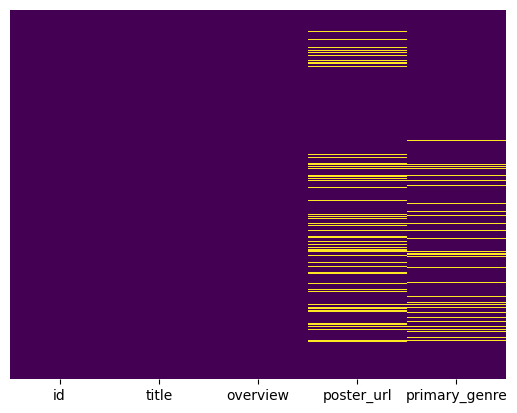

In [ ]:
# checking for missing values
import seaborn as sns
sns.heatmap(df.isna(), cbar = False, yticklabels = False, cmap = "viridis")

In [ ]:
# removing missing values
df.dropna(inplace = True)
df.head(3)

,id,title,overview,poster_url,primary_genre
0,9355,Mad Max Beyond Thunderdome,Mad Max becomes a pawn in a decadent oasis of ...,https://image.tmdb.org/t/p/w500/jJlxcEVVUHnrUe...,Action
1,707,A View to a Kill,A newly-developed microchip designed by Zorin ...,https://image.tmdb.org/t/p/w500/arJF829RP9cYvh...,Others
2,1369,Rambo: First Blood Part II,John Rambo is released from prison by the gove...,https://image.tmdb.org/t/p/w500/pzPdwOitmTleVE...,Action


Value Counts:
 primary_genre
Others         18469
Drama          15033
Comedy         10306
Documentary     9762
Action          9754
Horror          8984
Animation       8570
Name: count, dtype: int64


<Axes: xlabel='primary_genre'>

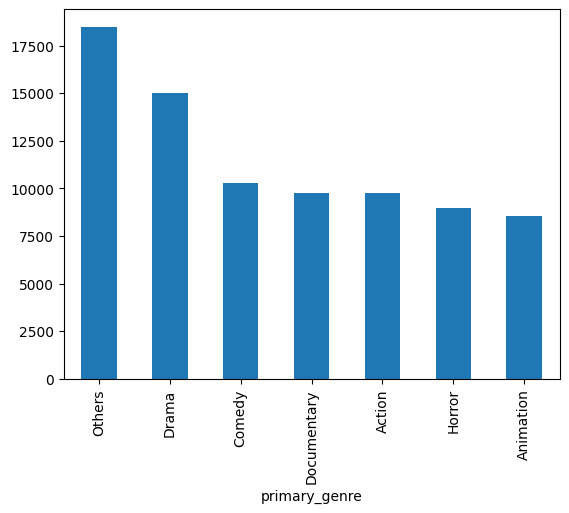

In [ ]:
# checking for value counts in primary_genre
print("Value Counts:\n", df["primary_genre"].value_counts())
df["primary_genre"].value_counts().plot(kind = "bar")

In [ ]:
# 🔴 Drop the "others" genre and rebuild X, y
# ------------------------------------------------
# 1. Keep rows whose primary_genre is NOT "others"
mask = ~df["primary_genre"].str.lower().eq("others")
df   = df.loc[mask].reset_index(drop=True)

# 2. Re-create feature matrix or embedding arrays
#    (replace `make_features(df)` with your own feature-building call)
# X = make_features(df)          # e.g. concatenated text & image embeddings
# y = df["primary_genre"].values # target labels now have no "others"
print(f"New dataset size : {len(df):,} movies")
# print("Remaining genres  :", pd.Series(y).unique())


New dataset size : 62,409 movies


<Axes: xlabel='primary_genre'>

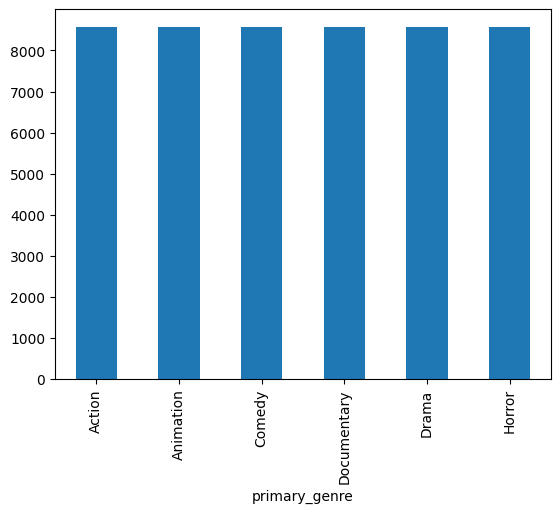

In [ ]:
# performing random undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
newDf, target = undersampler.fit_resample(df.drop("primary_genre", axis = 1), df["primary_genre"])
df = pd.concat([newDf, target], axis = 1)
df["primary_genre"].value_counts().plot(kind = "bar")

In [ ]:
# analyzing description texts
df['overview'].head(3)

5144                                                     
4622    How to Meet the Lucky Stars is a 1996 Hong Kon...
2388    A Super Namekian named Slug comes to invade Ea...
Name: overview, dtype: object

In [ ]:
# setting up NLTK
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()

def cleanText(text: str):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator).lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["overview"] = df["overview"].apply(cleanText)

count    51420.000000
mean        26.385920
std         19.300199
min          0.000000
25%         13.000000
50%         22.000000
75%         36.000000
max        162.000000
Name: overview, dtype: float64

[Text(0.5, 1.0, 'Distribution of Token Counts of Descriptions')]

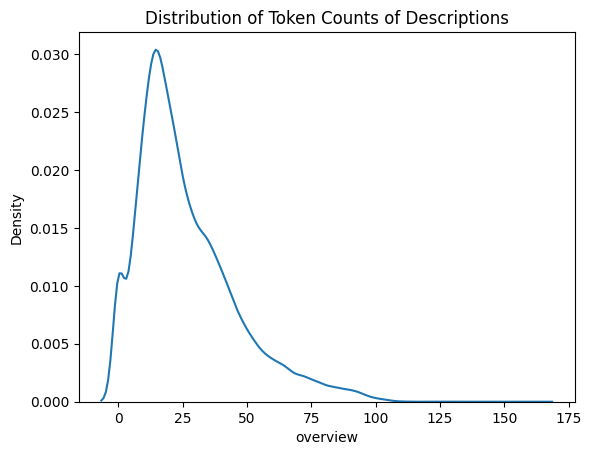

In [ ]:
# checking for distribution of word tokens present in the descriptions
tokenCounts = df["overview"].apply(lambda x: len(nltk.word_tokenize(text = x)))
display(tokenCounts.describe())
display(sns.kdeplot(x = tokenCounts).set(title = "Distribution of Token Counts of Descriptions"))

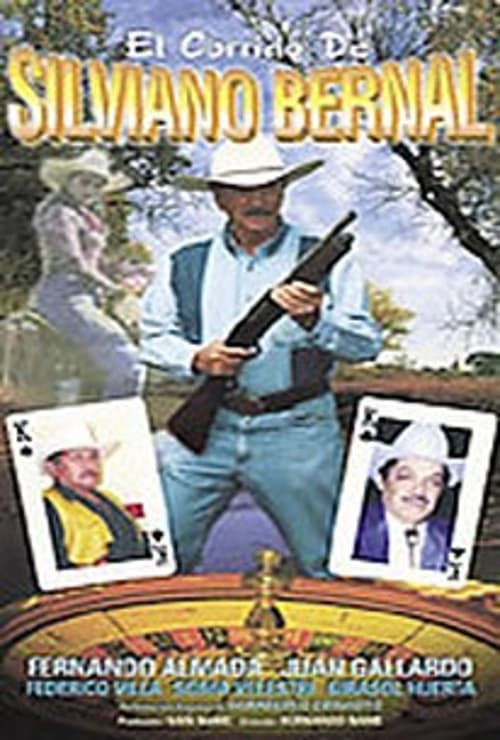

In [ ]:
# checking for a sample image
import requests
from PIL import Image
import io
Image.open(io.BytesIO(requests.get(df["poster_url"].iloc[0]).content))

In [ ]:
df.head()


,id,title,overview,poster_url,primary_genre
5144,525602,El corrido de Silviano Bernal,,https://image.tmdb.org/t/p/w500/71A6uzmfhsWRW1...,Action
4622,63033,How to Meet the Lucky Stars,meet lucky star 1996 hong kong film final film...,https://image.tmdb.org/t/p/w500/v9FwR5rg0opGzf...,Action
2388,39102,Dragon Ball Z: Lord Slug,super namekian named slug come invade earth z ...,https://image.tmdb.org/t/p/w500/1lmwZTsqwTtvd3...,Action
56185,457332,Hidden Strike,two elite soldier must escort civilian gauntle...,https://image.tmdb.org/t/p/w500/zsbolOkw8RhTU4...,Action
3794,356079,Police Rescue: The Movie,narcotic detective suspected corruption get tr...,https://image.tmdb.org/t/p/w500/wf4yTVnQPvwyAz...,Action


In [ ]:
import requests
from PIL import Image
import io
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm

def url_to_image(url: str) -> Image.Image | None:
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        return Image.open(io.BytesIO(response.content))
    except Exception:
        return None

def fetch_all_images(urls: list[str], max_workers: int = 20) -> list[Image.Image | None]:
    images = [None] * len(urls)
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(url_to_image, url): i for i, url in enumerate(urls)}
        for future in tqdm(as_completed(futures), total=len(futures), desc="Downloading images"):
            i = futures[future]
            try:
                images[i] = future.result()
            except Exception:
                images[i] = None
    return images

all_posters = fetch_all_images(df["poster_url"].tolist())

In [ ]:
# # using mixedbread-ai/mxbai-embed-large-v1 embeddings with embedding dimension as 1024
# from sentence_transformers import SentenceTransformer
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# textEncoderModel = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1", truncate_dim = 1024).to("cuda")
# # textEmbeddings = textEncoderModel.encode(df["overview"].tolist(), normalize_embeddings=True)
# textEmbeddings = textEncoderModel.encode(
#     df["overview"].tolist(),
#     normalize_embeddings = True,
#     batch_size           = 64,          # 32–128 → tune to your GPU
#     convert_to_numpy     = True,
#     device               = DEVICE
# )
# torch.cuda.empty_cache(); gc.collect()

# using mixedbread-ai/mxbai-embed-large-v1 embeddings with embedding dimension as 1024
from sentence_transformers import SentenceTransformer
textEncoderModel = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1", truncate_dim = 1024).to("cuda")
textEmbeddings = textEncoderModel.encode(df["overview"].tolist(), normalize_embeddings=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/114k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [ ]:
# # Convert to lists if not already
# allPostersList = list(all_posters)
# textEmbeddingsList = list(textEmbeddings)

# # Filter out None entries in one pass
# filtered = [(p, e) for p, e in zip(allPostersList, textEmbeddingsList) if p is not None]

# # Unzip back into two lists
# allPostersList, textEmbeddingsList = zip(*filtered)
# allPostersList = list(allPostersList)
# textEmbeddingsList = list(textEmbeddingsList)

allPostersList     = list(all_posters)
textEmbeddingsList = list(textEmbeddings)
orig_indices       = list(range(len(allPostersList)))

# Filter out None entries and keep their df‐row indices
filtered = [
    (idx, p, e)
    for idx, (p, e) in zip(orig_indices, zip(allPostersList, textEmbeddingsList))
    if p is not None
]

# Unzip back into three lists
success_idx, allPostersList, textEmbeddingsList = zip(*filtered)
success_idx = list(success_idx)
allPostersList     = list(allPostersList)
textEmbeddingsList = list(textEmbeddingsList)


In [ ]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
from tqdm import tqdm
import torch

# setup
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50", trust_remote_code=True)
model = AutoModel.from_pretrained("microsoft/resnet-50", trust_remote_code=True).to("cuda")
model.eval()


# generating embeddings
embeddings = []
with torch.inference_mode():
    for img in tqdm(allPostersList, desc="IMAGES EMBEDDED:"):
        inputs = processor(images=img.convert("RGB"), return_tensors="pt").to("cuda")
        outputs = model(**inputs)
        embedding = outputs.last_hidden_state.mean(dim=(2, 3))
        embeddings.append(embedding.squeeze().cpu())

embeddings

IMAGES EMBEDDED:: 100%|██████████| 51420/51420 [14:25<00:00, 59.43it/s]


[tensor([0.0024, 0.0000, 0.0000,  ..., 0.0000, 0.0320, 0.0221]),
 tensor([0.0122, 0.0000, 0.0176,  ..., 0.0000, 0.0649, 0.0530]),
 tensor([0.1045, 0.0000, 0.0000,  ..., 0.0000, 0.0134, 0.0816]),
 tensor([0.0000, 0.1548, 0.0228,  ..., 0.0000, 0.0028, 0.0136]),
 tensor([0.0749, 0.1550, 0.0266,  ..., 0.0013, 0.0103, 0.0071]),
 tensor([0.0224, 0.0036, 0.0063,  ..., 0.0000, 0.0539, 0.0000]),
 tensor([0.0465, 0.1170, 0.0469,  ..., 0.0039, 0.0608, 0.0134]),
 tensor([0.3206, 0.1897, 0.0000,  ..., 0.0258, 0.0102, 0.0000]),
 tensor([0.1039, 0.0230, 0.0244,  ..., 0.0381, 0.0000, 0.0000]),
 tensor([0.0011, 0.0000, 0.0005,  ..., 0.0000, 0.0379, 0.0507]),
 tensor([0.1090, 0.0178, 0.0047,  ..., 0.0000, 0.0080, 0.0000]),
 tensor([0.0897, 0.0087, 0.0000,  ..., 0.0000, 0.0628, 0.0186]),
 tensor([0.0552, 0.0174, 0.0000,  ..., 0.0000, 0.0132, 0.0482]),
 tensor([0.0289, 0.0603, 0.0000,  ..., 0.0000, 0.0345, 0.0000]),
 tensor([0.0011, 0.0307, 0.0000,  ..., 0.0000, 0.0777, 0.1508]),
 tensor([0.0498, 0.0091, 

In [ ]:
# converting image embeddings to numpy arrays
import numpy as np
imageEmbeddings = np.array([np.array(embedding) for embedding in embeddings])

/tmp/ipykernel_1167/387243634.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  imageEmbeddings = np.array([np.array(embedding) for embedding in embeddings])


In [ ]:
imageEmbeddings.shape

(51420, 2048)

In [ ]:
print("imageEmbeddings shape:", imageEmbeddings.shape)   # expect (60000, 2048)
print("textEmbeddings  shape:", textEmbeddings.shape)    # expect (60000, 768)


imageEmbeddings shape: (51420, 2048)
textEmbeddings  shape: (51420, 1024)


In [ ]:
# ── Create y from your dataframe ───────────────────────────────────────
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["genre_id"] = le.fit_transform(df["primary_genre"])   # add new int column
y = df["genre_id"].values                                # 1-D numpy array

print("y shape:", y.shape)
print("class ↦ id mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


y shape: (51420,)
class ↦ id mapping: {'Action': np.int64(0), 'Animation': np.int64(1), 'Comedy': np.int64(2), 'Documentary': np.int64(3), 'Drama': np.int64(4), 'Horror': np.int64(5)}


In [ ]:
# === TEXT-ONLY LSTM CLASSIFIER =========================================
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_lstm_text(X_text, y, epochs=15, hidden=256, batch=128, lr=1e-3):
    """
    X_text : np.ndarray  (N, seq_len, embed_dim)  OR  (N, embed_dim)
             If 2-D, we treat each vector as a sequence of length 1.
    y      : np.ndarray  integer labels
    """
    # Ensure 3-D: (N, seq_len, embed_dim)
    if X_text.ndim == 2:
        X_text = X_text[:, None, :]
    seq_len, embed_dim = X_text.shape[1], X_text.shape[2]
    n_classes          = int(y.max() + 1)

    Xtr, Xval, ytr, yval = train_test_split(
        X_text, y, test_size=0.2, random_state=42, stratify=y
    )

    ds_tr  = TensorDataset(torch.tensor(Xtr, dtype=torch.float32),
                           torch.tensor(ytr, dtype=torch.long))
    ds_val = TensorDataset(torch.tensor(Xval, dtype=torch.float32),
                           torch.tensor(yval, dtype=torch.long))
    dl_tr  = DataLoader(ds_tr,  batch_size=batch, shuffle=True)
    dl_val = DataLoader(ds_val, batch_size=batch)

    class TextLSTM(nn.Module):
        def __init__(self):
            super().__init__()
            self.lstm  = nn.LSTM(embed_dim, hidden, num_layers=2,
                                 batch_first=True, dropout=0.3, bidirectional=False)
            self.fc    = nn.Linear(hidden, n_classes)
        def forward(self, x):
            _, (h_n, _) = self.lstm(x)           # h_n shape: (num_layers, B, hidden)
            out = self.fc(h_n[-1])               # use last layer’s hidden state
            return out

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model  = TextLSTM().to(device)
    opt    = torch.optim.AdamW(model.parameters(), lr=lr)
    crit   = nn.CrossEntropyLoss()

    for epoch in range(1, epochs + 1):
        model.train()
        for xb, yb in dl_tr:
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            loss = crit(model(xb), yb)
            loss.backward()
            opt.step()
        if epoch % 5 == 0 or epoch == epochs:
            model.eval()
            all_pred, all_true = [], []
            with torch.no_grad():
                for xb, yb in dl_val:
                    xb = xb.to(device)
                    pred = model(xb).argmax(1).cpu()
                    all_pred.extend(pred)
                    all_true.extend(yb)
            print(f"[Epoch {epoch}] val acc = "
                  f"{(torch.tensor(all_pred) == torch.tensor(all_true)).float().mean():.4f}")

    print("\nTEXT-ONLY LSTM – validation report")
    print(classification_report(all_true, all_pred))
    return model

lstm_text_model = train_lstm_text(textEmbeddings, y)


[Epoch 5] val acc = 0.6479
[Epoch 10] val acc = 0.6538
[Epoch 15] val acc = 0.6585

TEXT-ONLY LSTM – validation report
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1714
           1       0.72      0.67      0.70      1714
           2       0.59      0.52      0.56      1714
           3       0.65      0.89      0.75      1714
           4       0.54      0.47      0.50      1714
           5       0.71      0.75      0.73      1714

    accuracy                           0.66     10284
   macro avg       0.66      0.66      0.65     10284
weighted avg       0.66      0.66      0.65     10284



In [ ]:
# === IMAGE-ONLY MLP CLASSIFIER =========================================
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_mlp_image(X_img, y, epochs=20, batch=256, lr=1e-3):
    """
    X_img : np.ndarray  (N, embed_dim)
    y     : np.ndarray  integer labels
    """
    in_dim       = X_img.shape[1]
    n_classes    = int(y.max() + 1)

    Xtr, Xval, ytr, yval = train_test_split(
        X_img, y, test_size=0.2, random_state=42, stratify=y
    )

    ds_tr  = TensorDataset(torch.tensor(Xtr, dtype=torch.float32),
                           torch.tensor(ytr, dtype=torch.long))
    ds_val = TensorDataset(torch.tensor(Xval, dtype=torch.float32),
                           torch.tensor(yval, dtype=torch.long))
    dl_tr  = DataLoader(ds_tr,  batch_size=batch, shuffle=True)
    dl_val = DataLoader(ds_val, batch_size=batch)

    class ImageMLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(in_dim, 512),
                nn.ReLU(),
                nn.Dropout(0.4),
                nn.Linear(512, 256),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(256, n_classes)
            )
        def forward(self, x): return self.net(x)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model  = ImageMLP().to(device)
    opt    = torch.optim.AdamW(model.parameters(), lr=lr)
    crit   = nn.CrossEntropyLoss()

    for epoch in range(1, epochs + 1):
        model.train()
        for xb, yb in dl_tr:
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad()
            loss = crit(model(xb), yb)
            loss.backward()
            opt.step()
        if epoch % 5 == 0 or epoch == epochs:
            model.eval()
            all_pred, all_true = [], []
            with torch.no_grad():
                for xb, yb in dl_val:
                    xb = xb.to(device)
                    pred = model(xb).argmax(1).cpu()
                    all_pred.extend(pred)
                    all_true.extend(yb)
            print(f"[Epoch {epoch}] val acc = "
                  f"{(torch.tensor(all_pred) == torch.tensor(all_true)).float().mean():.4f}")

    print("\nIMAGE-ONLY MLP – validation report")
    print(classification_report(all_true, all_pred))
    return model
X_img = imageEmbeddings
y_img = y[success_idx] # align with embeddings
assert len(X_img) == len(y_img)
mlp_image_model = train_mlp_image(X_img, y_img)
mlp_image_model = train_mlp_image(imageEmbeddings, y)


[Epoch 5] val acc = 0.5627
[Epoch 10] val acc = 0.5538
[Epoch 15] val acc = 0.5433
[Epoch 20] val acc = 0.5379

IMAGE-ONLY MLP – validation report
              precision    recall  f1-score   support

           0       0.55      0.52      0.53      1714
           1       0.72      0.78      0.75      1714
           2       0.53      0.43      0.47      1714
           3       0.50      0.51      0.50      1714
           4       0.41      0.45      0.43      1714
           5       0.52      0.55      0.54      1714

    accuracy                           0.54     10284
   macro avg       0.54      0.54      0.54     10284
weighted avg       0.54      0.54      0.54     10284

[Epoch 5] val acc = 0.5625
[Epoch 10] val acc = 0.5498
[Epoch 15] val acc = 0.5358
[Epoch 20] val acc = 0.5409

IMAGE-ONLY MLP – validation report
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1714
           1       0.74      0.76      0.75      1714


In [ ]:
# Convert (59990, 7, 7)  →  (59990, 49)
# imageEmbeddings = imageEmbeddings.reshape(imageEmbeddings.shape[0], -1)
print("Flattened imageEmbeddings:", imageEmbeddings.shape)   # (59990, 49)


Flattened imageEmbeddings: (51420, 2048)


In [ ]:
# Should be >0 if real embeddings are present
non_zero_rows = np.count_nonzero(np.linalg.norm(imageEmbeddings, axis=1) > 0)
print("Rows with real poster features:", non_zero_rows)    # probably prints 0 right now


Rows with real poster features: 51420


/venv/main/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Train Accuracy: 0.7307
✅ Validation Accuracy: 0.7179

📊 Train Classification Report:
              precision    recall  f1-score   support

      Action       0.72      0.73      0.73      6856
   Animation       0.82      0.84      0.83      6856
      Comedy       0.66      0.62      0.64      6856
 Documentary       0.79      0.84      0.81      6856
       Drama       0.63      0.57      0.60      6856
      Horror       0.75      0.78      0.77      6856

    accuracy                           0.73     41136
   macro avg       0.73      0.73      0.73     41136
weighted avg       0.73      0.73      0.73     41136


📊 Validation Classification Report:
              precision    recall  f1-score   support

      Action       0.72      0.71      0.72      1714
   Animation       0.80      0.83      0.82      1714
      Comedy       0.65      0.61      0.63      1714
 Documentary       0.78      0.83      0.81      1714
       Drama       0.59      0.54      0.56      1714
      Ho

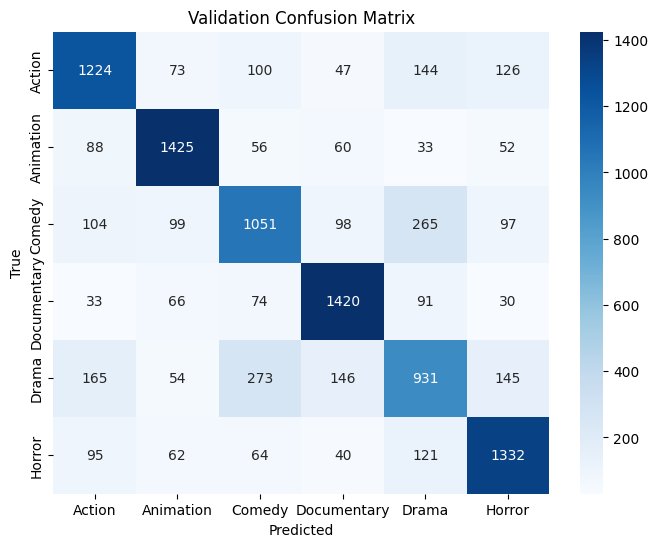

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === Input: Choose your feature set ===
# X = textEmbeddings  # or imageEmbeddings or fused
# GOOD: row-wise concatenation → 2-D
X = np.concatenate([imageEmbeddings, textEmbeddings], axis=1)   # (60000, 2816)
y = df["primary_genre"].values

# === Optional: PCA (to reduce overfitting in high-dim) ===
use_pca = True
n_components = 256  # Tune this (e.g., 50, 100, 200)

# === Train/Val Split ===
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Normalize ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# === Apply PCA if needed ===
if use_pca:
    pca = PCA(n_components=n_components, random_state=42)
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)

# === Logistic Regression with Regularization ===
# C is inverse of regularization: lower C = stronger regularization
clf = LogisticRegression(
    C=0.1,  # try 0.01 or 0.001 for stronger regularization
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)
clf.fit(X_train, y_train)

# === Predict ===
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# === Accuracy ===
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Validation Accuracy: {val_acc:.4f}")

# === Reports ===
print("\n📊 Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n📊 Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# === Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Validation Confusion Matrix")
plt.show()


In [ ]:
# stacking images and text embeddings horizontally
embeddings = np.hstack((imageEmbeddings, textEmbeddings))

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["primary_genre"] = encoder.fit_transform(df["primary_genre"])

In [ ]:
# using a train-test-split for confusion matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(embeddings, df["primary_genre"], test_size=0.20, random_state=10)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_train_enc = le.fit_transform(y_train)   # e.g. ["Action","Drama","Action"] → [0,1,0]
# y_test_enc  = le.transform(y_test)

# Convert to tensors (if not already done earlier)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# PyTorch Logistic Regression Model
class PyTorchLogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(PyTorchLogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return F.log_softmax(self.linear(x), dim=1)

num_classes = len(np.unique(y_train))      # y_train is the 1-D int64 array
print("Num classes:", num_classes)         # → should print 7


# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logreg_model = PyTorchLogisticRegression(x_train.shape[1], num_classes).to(device)
optimizer = torch.optim.Adam(logreg_model.parameters(), lr=0.01, weight_decay=1e-4)
criterion = nn.NLLLoss()

# Training loop
train_accuracies = []
val_accuracies = []

best_val_acc = 0
patience = 3
wait = 0

for epoch in range(20):  # Increased epochs
    logreg_model.train()
    total_loss = 0
    correct = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = logreg_model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (preds.argmax(dim=1) == yb).sum().item()

    train_acc = correct / len(train_loader.dataset)
    train_accuracies.append(train_acc)

    # Validation accuracy
    logreg_model.eval()
    correct = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = logreg_model(xb)
            correct += (preds.argmax(dim=1) == yb).sum().item()
    val_acc = correct / len(test_loader.dataset)
    val_accuracies.append(val_acc)

    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break


Num classes: 6
[Epoch 1] Loss: 573.0622 | Train Acc: 0.6763 | Val Acc: 0.7066
[Epoch 2] Loss: 505.9368 | Train Acc: 0.7130 | Val Acc: 0.7023
[Epoch 3] Loss: 493.8095 | Train Acc: 0.7204 | Val Acc: 0.6982
[Epoch 4] Loss: 488.3435 | Train Acc: 0.7236 | Val Acc: 0.6928
Early stopping triggered.


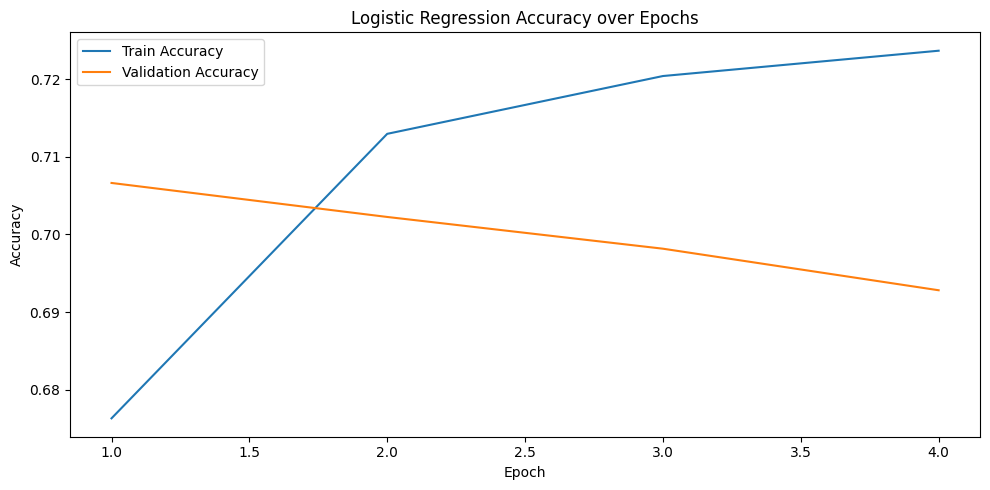

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy over Epochs")
plt.legend()
plt.tight_layout()
plt.show()

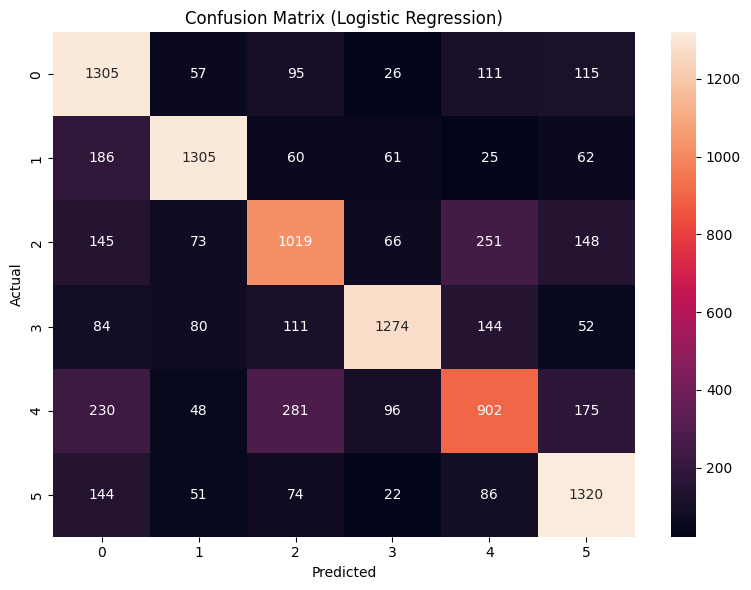

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluation
logreg_model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = logreg_model(xb)
        all_preds.append(preds.cpu().numpy())

predicted = np.argmax(np.vstack(all_preds), axis=1)

# 💡 Make sure we tell sklearn the label order
cm = confusion_matrix(y_test, predicted, labels=range(len(encoder.classes_)))

labels = encoder.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.tight_layout()
plt.show()

In [ ]:
print("Unique y_test values:", np.unique(y_test))
print("Encoder classes:", encoder.classes_)


Unique y_test values: [0 1 2 3 4 5]
Encoder classes: [0 1 2 3 4 5]


In [ ]:
# standardizing the inputs
# Convert to torch tensors first
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Compute mean and std from training data
mean = x_train_tensor.mean(dim=0, keepdim=True)
std = x_train_tensor.std(dim=0, keepdim=True)

# Avoid division by zero
std[std == 0] = 1

# Normalize
x_train_tensor = (x_train_tensor - mean) / std
x_test_tensor = (x_test_tensor - mean) / std

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Convert data to tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# Define the PyTorch ANN model
class GenreClassifier(nn.Module):
    def __init__(self, input_dim):
        super(GenreClassifier, self).__init__()

        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)

        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.3)

        self.output = nn.Linear(32, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = F.relu(self.bn4(self.fc4(x)))
        x = self.dropout4(x)
        return F.log_softmax(self.output(x), dim=1)


# Instantiate and train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GenreClassifier(x_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.NLLLoss()

train_losses = []
train_accuracies = []
val_accuracies = []

best_val_acc = 0
patience = 5
wait = 0

for epoch in range(50):
    model.train()
    total_loss = 0
    correct = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (preds.argmax(dim=1) == yb).sum().item()

    train_acc = correct / len(train_loader.dataset)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    correct = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            correct += (preds.argmax(dim=1) == yb).sum().item()

    val_acc = correct / len(test_loader.dataset)
    val_accuracies.append(val_acc)
    train_losses.append(total_loss)

    print(f"Epoch {epoch+1:2d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("⏹ Early stopping triggered.")
            break


Epoch  1 | Loss: 760.7444 | Train Acc: 0.5798 | Val Acc: 0.7116
Epoch  2 | Loss: 612.5182 | Train Acc: 0.6798 | Val Acc: 0.7202
Epoch  3 | Loss: 576.6483 | Train Acc: 0.6985 | Val Acc: 0.7223
Epoch  4 | Loss: 554.3013 | Train Acc: 0.7104 | Val Acc: 0.7238
Epoch  5 | Loss: 538.1142 | Train Acc: 0.7194 | Val Acc: 0.7209
Epoch  6 | Loss: 523.7954 | Train Acc: 0.7260 | Val Acc: 0.7217
Epoch  7 | Loss: 509.7205 | Train Acc: 0.7333 | Val Acc: 0.7226
Epoch  8 | Loss: 499.6237 | Train Acc: 0.7397 | Val Acc: 0.7261
Epoch  9 | Loss: 487.0057 | Train Acc: 0.7477 | Val Acc: 0.7204
Epoch 10 | Loss: 472.9467 | Train Acc: 0.7544 | Val Acc: 0.7229
Epoch 11 | Loss: 466.5673 | Train Acc: 0.7560 | Val Acc: 0.7195
Epoch 12 | Loss: 451.9335 | Train Acc: 0.7641 | Val Acc: 0.7232
Epoch 13 | Loss: 441.6626 | Train Acc: 0.7675 | Val Acc: 0.7184
⏹ Early stopping triggered.


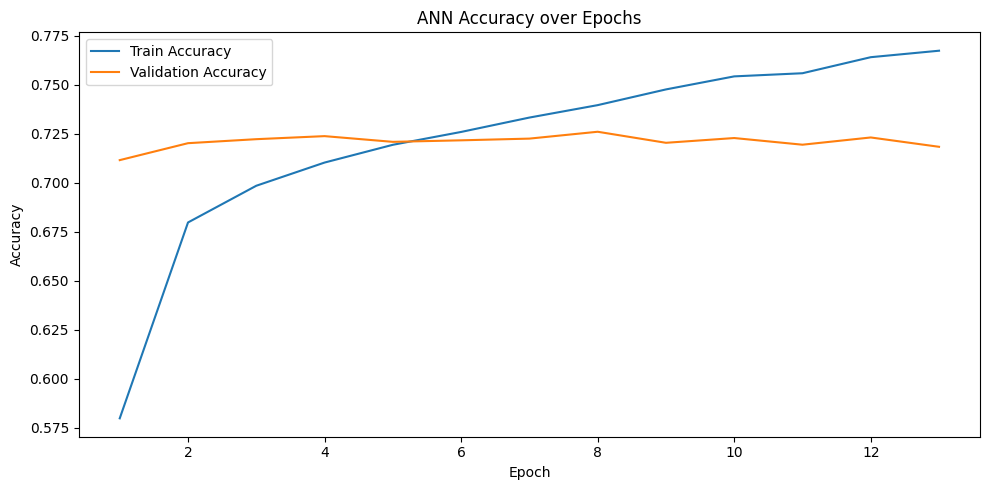

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()


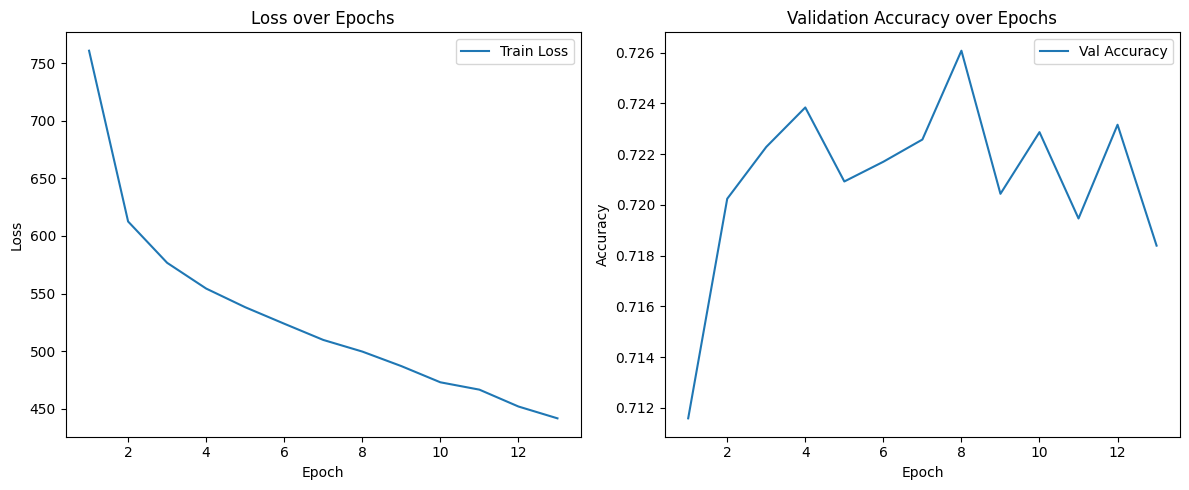

In [ ]:


epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 5))

# Loss over epochs
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


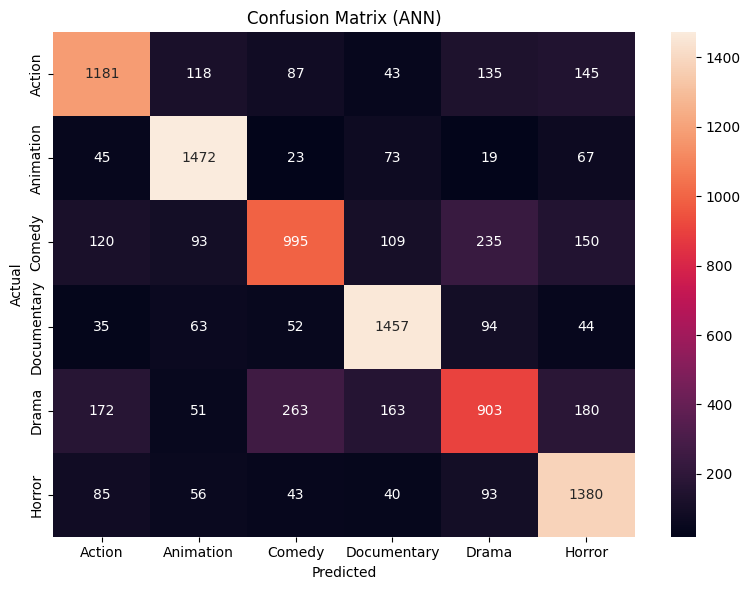

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for test set
model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        preds = model(xb)
        all_preds.append(preds.cpu().numpy())

predicted = np.argmax(np.vstack(all_preds), axis=1)
cm = confusion_matrix(y_test, predicted)

labels = le.classes_
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (ANN)")
plt.tight_layout()
plt.show()


In [ ]:
model.eval()
correct = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        correct += (preds.argmax(dim=1) == yb).sum().item()

final_acc = correct / len(test_loader.dataset)
print(f"Final Test Accuracy: {final_acc:.4f}")


Final Test Accuracy: 0.7184
